## Hierachical Models Assignment

In [3]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [4]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

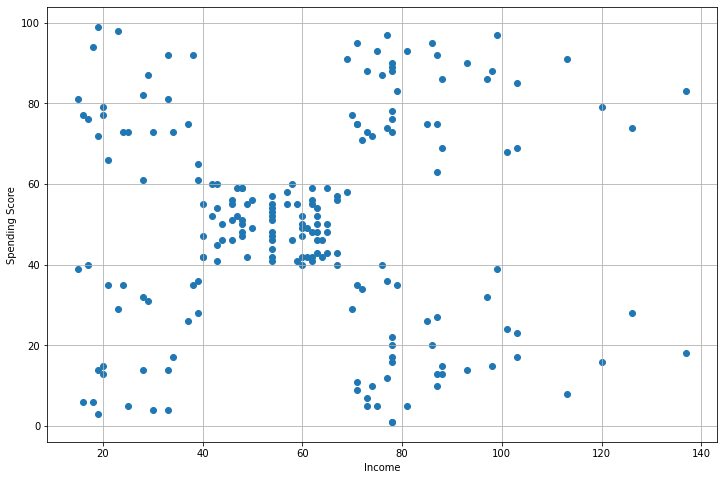

In [6]:
req_column = df[df.columns[3:5]]

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

#plotting clusters
plt.scatter(req_column[req_column.columns[0]],req_column[req_column.columns[1]],marker = 'o')
plt.grid()
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

* define function plot_dendogram

In [7]:
column_array=np.array(df[['Annual Income (k$)','Spending Score (1-100)']])
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

* Plot dendrogram

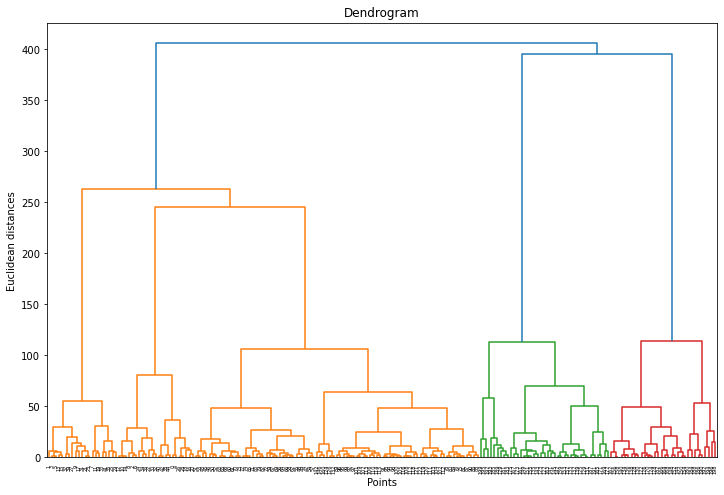

In [8]:
plot_dendrogram(column_array)

* Fit Hierarchical clustering with optimal number of clusters

In [14]:
#object creation
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 5)


#predict
y_hc = ac.fit_predict(column_array)


* define function plot_clusters

In [15]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* Plot HC clusters

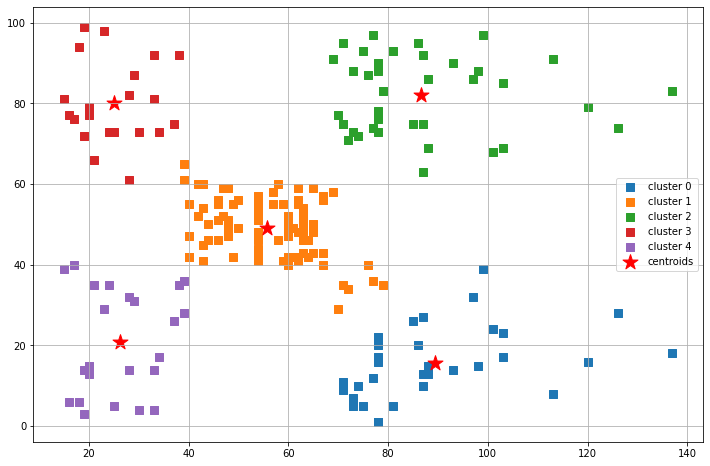

In [16]:
plot_clusters(column_array, y_hc, plt_cluster_centers= True)
